In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


2023-07-03 10:02:08.773609: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 10:02:09.434931: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 10:02:09.436387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 10:02:11.900170: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv('data/RMCAB_air_quality_sensor_data.csv')
df.head()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime
0,56.6,32.7,7.504,15.962,23.493,0.44924,2.431,USM,01-01-2021 01:00
1,59.3,39.3,16.560,17.866,34.426,0.69832,1.121,USM,01-01-2021 02:00
2,96.4,70.8,22.989,17.802,40.791,0.88243,1.172,USM,01-01-2021 03:00
3,108.3,81.0,3.704,9.886,13.591,0.29549,6.565,USM,01-01-2021 04:00
4,87.7,56.1,2.098,9.272,11.371,0.16621,9.513,USM,01-01-2021 05:00


In [4]:
stations_data = pd.read_csv('data/stations_loc.csv')
stations_data.head()

,estacion,Sigla,Latitud,Longitud,Altitud (m),Altura (m),Localidad,Tipo de zona,Tipo de estación,Dirección
0,guaymaral,GYR,"4°47'01.5""N","74°02'38.9""W",2580,0,Suba,Sub urbana,De fondo,Autopista Norte # 205-59
1,usaquen,USQ,"4°42'37.26""N","74°1'49.50""W",2570,10,Usaquén,Urbana,De fondo,Carrera 7B Bis # 132-11
2,suba,SUB,"4°45'40.49""N","74° 5'36.46""W",2571,6,Suba,Sub urbana,De fondo,Carrera 111 # 159A-61
3,bolivia,BOL,"4°44'08.9""N","74°07'33.2""W",2574,0,Engativá,Sub urbana,De fondo,Avenida Calle 80 # 121-98
4,las_ferias,LFR,"4°41'26.52""N","74°4'56.94""W",2552,0,Engativá,Urbana,De tráfico,Avenida Calle 80 # 69Q-50


In [75]:
df_ll = stations_data[['Sigla','Latitud','Longitud']]
df_ll.rename(columns={'Sigla':'Station'},inplace=True)
df_rich = pd.merge(df,df_ll, on='Station',how='inner')
df_rich.head()

/tmp/ipykernel_17778/2779370333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ll.rename(columns={'Sigla':'Station'},inplace=True)


,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Latitud,Longitud
0,56.6,32.7,7.504,15.962,23.493,0.44924,2.431,USM,01-01-2021 01:00,"4°31'55.4""N","74°07'01.7""W"
1,59.3,39.3,16.560,17.866,34.426,0.69832,1.121,USM,01-01-2021 02:00,"4°31'55.4""N","74°07'01.7""W"
2,96.4,70.8,22.989,17.802,40.791,0.88243,1.172,USM,01-01-2021 03:00,"4°31'55.4""N","74°07'01.7""W"
3,108.3,81.0,3.704,9.886,13.591,0.29549,6.565,USM,01-01-2021 04:00,"4°31'55.4""N","74°07'01.7""W"
4,87.7,56.1,2.098,9.272,11.371,0.16621,9.513,USM,01-01-2021 05:00,"4°31'55.4""N","74°07'01.7""W"


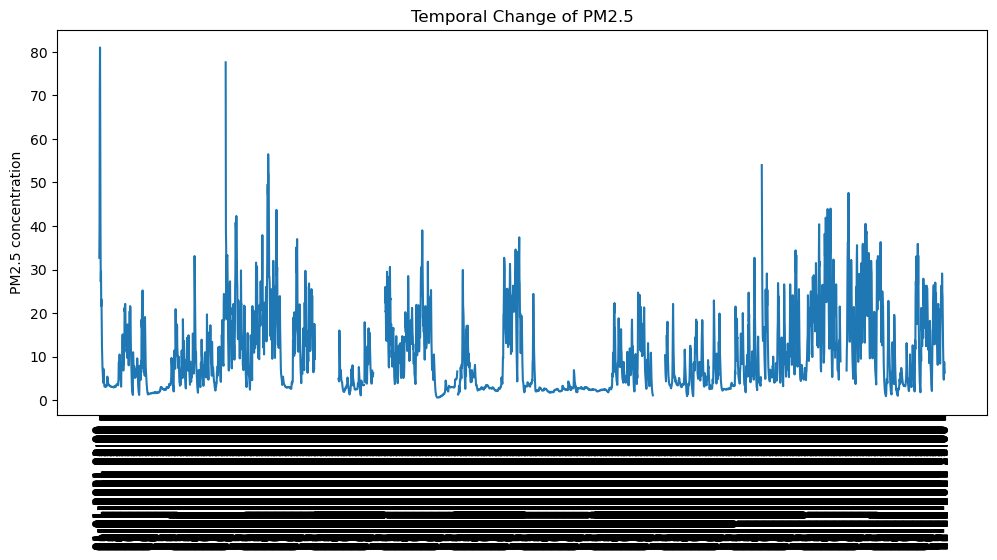

In [76]:
polutant = 'PM2.5'
station = 'USM'
date_range = ['01-01-2021 01:00','13-01-2021 24:00']
#Choosing the date range 
df_rich = df_rich[df_rich['DateTime']>=date_range[0]]
df_rich = df_rich[df_rich['DateTime']<=date_range[1]]
## Choosing the station
df_rich = df_rich[df_rich['Station']==station]
## Choosing the polutant
df_rich = df_rich[[polutant,'DateTime']]

plt.figure(figsize=(12,5))
plt.plot(df_rich['DateTime'],df_rich[polutant])
plt.title('Temporal Change of {}'.format(polutant))
plt.ylabel('{} concentration'.format(polutant))
plt.xticks(rotation=90)
plt.show()

In [77]:
df_rich.isnull().sum()

PM2.5       236
DateTime      0
dtype: int64

In [ ]:
polutants = ['PM10','PM2.5','NO','NO2','NOX','CO','OZONO']
polutants_data = df[polutants]
polutants_data.head()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO
0,56.6,32.7,7.504,15.962,23.493,0.44924,2.431
1,59.3,39.3,16.560,17.866,34.426,0.69832,1.121
2,96.4,70.8,22.989,17.802,40.791,0.88243,1.172
3,108.3,81.0,3.704,9.886,13.591,0.29549,6.565
4,87.7,56.1,2.098,9.272,11.371,0.16621,9.513


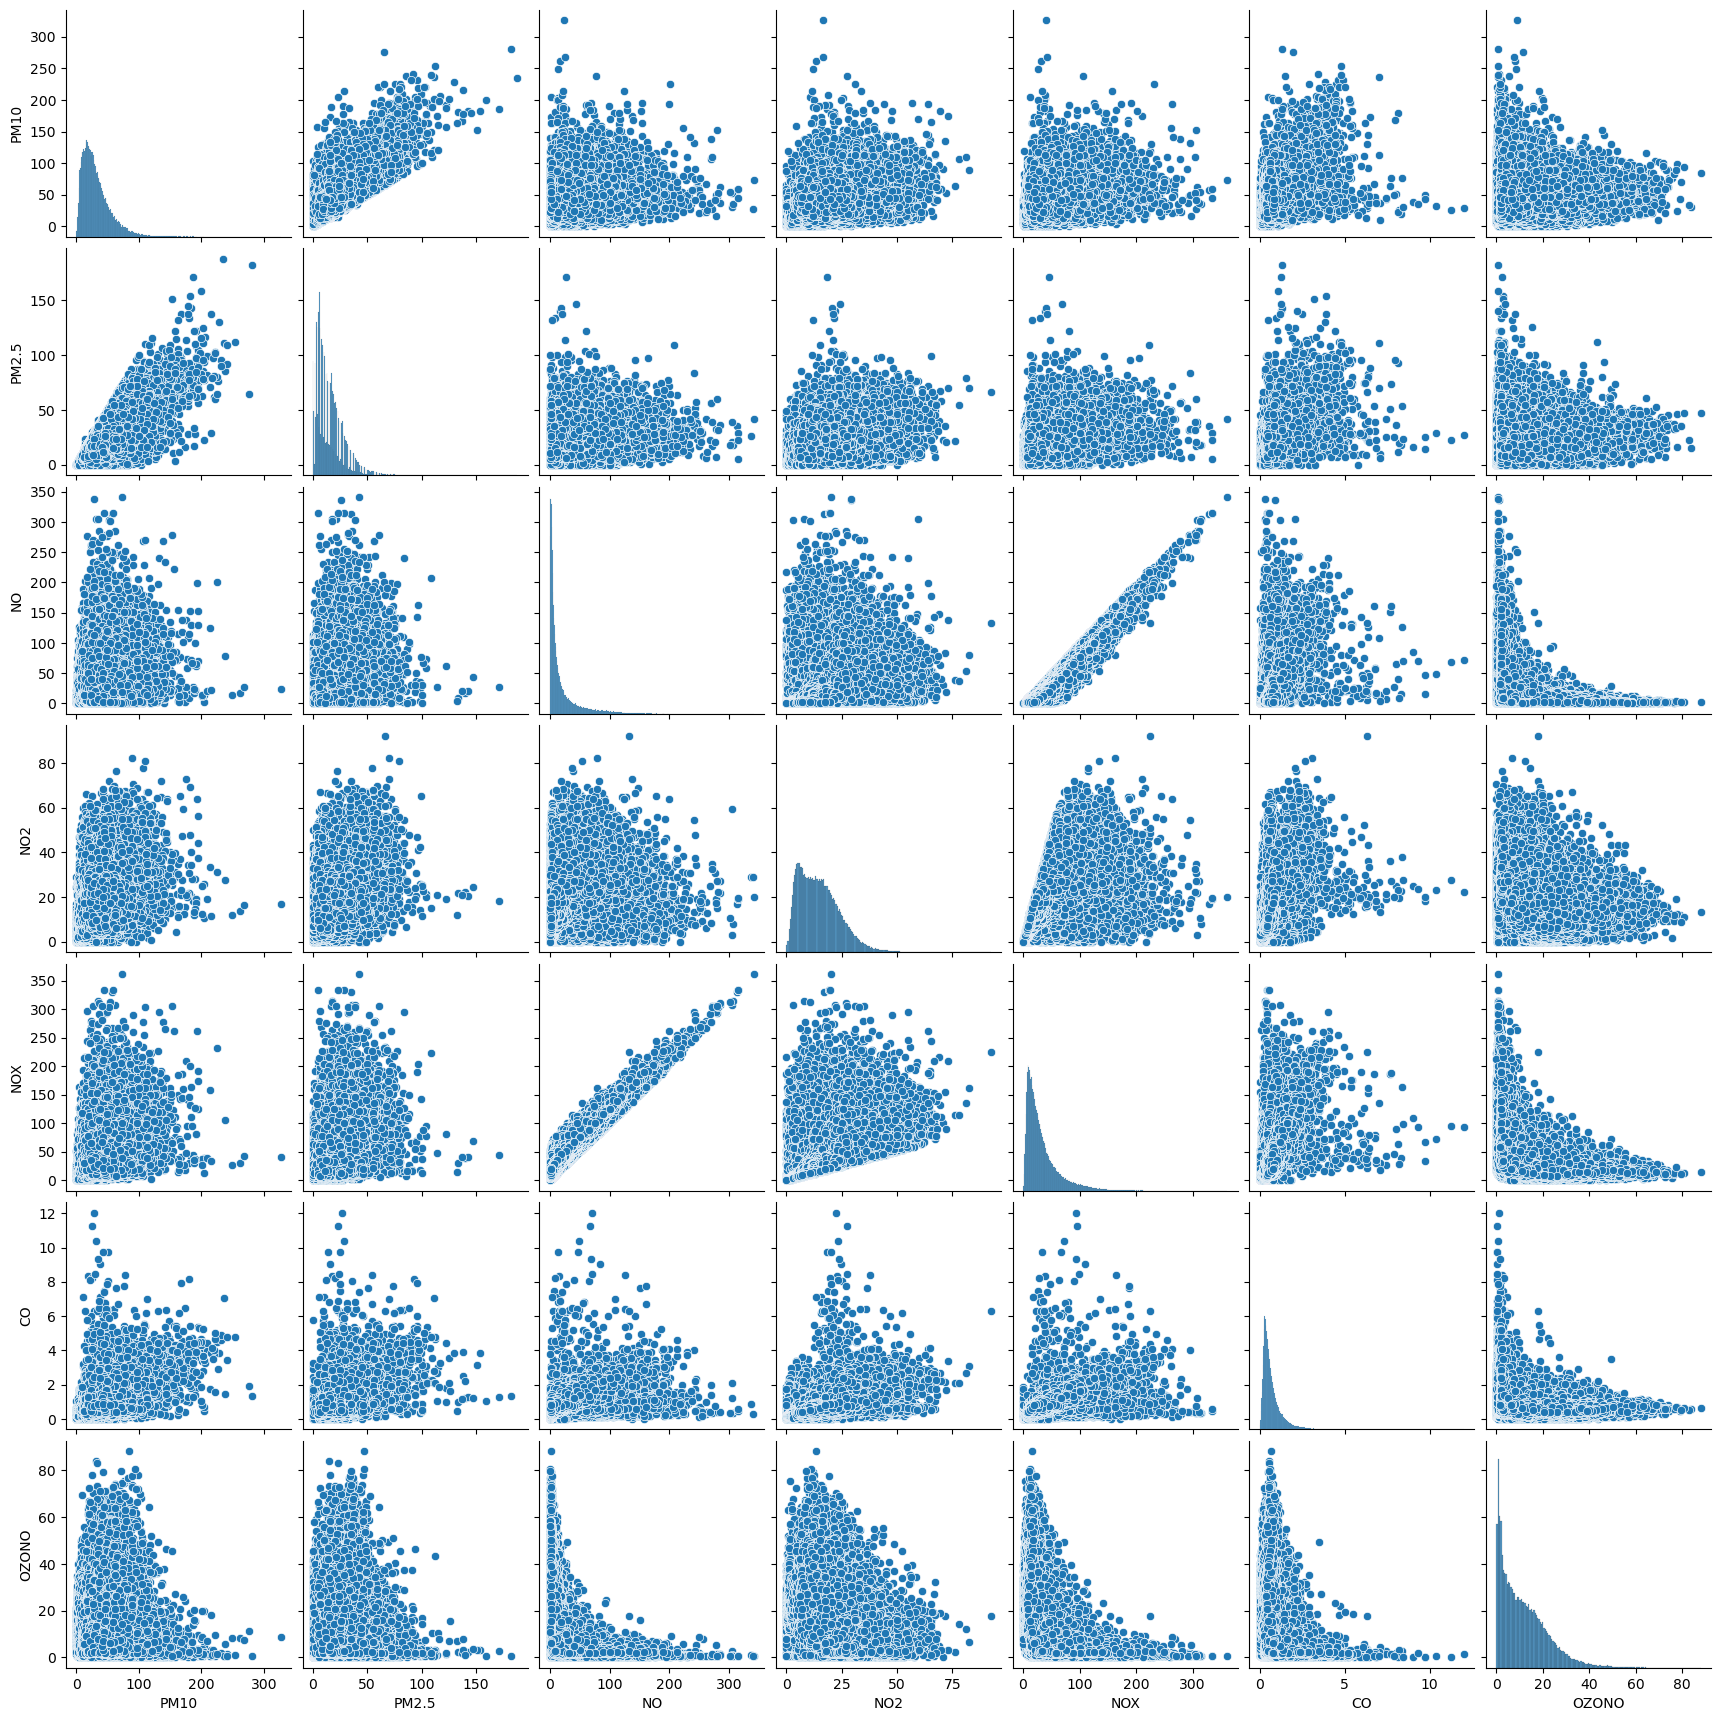

In [25]:
sns.pairplot(polutants_data)
plt.show()

In [24]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
glue.head()

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
